<a href="https://colab.research.google.com/github/yiboxu20/MachineLearning/blob/main/Resources/Module0/Probability_and_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is partially from https://peterroelants.github.io

# Probability: univariable models

## Probability Density Function
- PDF a.k.a. Probability Distribution Density Function, $p(x)$
- CDF a.k.a Cummulative Distribution Function, Integral up to given $x$: prob of being less than $x$

> $\displaystyle \mathrm{CDF}(x) = \int_{-\infty}^{x} p(t)\,dt$

- We call this distribution the univariate model because it consists of only one random variable.
- Probabiliy of $x$ being between $a$ and $b$ for any $(a,b)$ is

> $\displaystyle P_{ab} = \int_a^b p(x)\,dx$.
We always have $\displaystyle  \int_{-\infty}^{\infty} p(x)\,dx = 1$


- Uniform distribution on $(a,b)$

> $\displaystyle  U(x;a,b) = \frac{\pmb{1}_{ab}(x)}{b\!-\!a} $,
> where $\pmb{1}_{ab}(x)$ is 1 between $a$ and $b$, but 0 otherwise

- Gaussian or normal distribution, $\mathcal{N}(\mu, \sigma^2)$

> $\displaystyle  G\left(x;\mu,\sigma^2\right) = \frac{{1}}{\sqrt{2\pi\sigma^2}}\ \exp\left[{-\frac{(x\!-\!\mu)^2}{2 \sigma^2} }\right]$




### Characterization of PDFs

- Expectation value of $X$ is $\displaystyle \mu = \mathbb{E}[X] = \int_{-\infty}^{\infty}\! x\ p(x)\,dx$

- Expectation value of any $f(X)$ is $\displaystyle \mathbb{E}[f(X)] = \int_{-\infty}^{\infty}\! f(x)\,p(x)\,dx$

- Moments is $\displaystyle \mathbb{E}[X^k]$
  and  Central moments is $\displaystyle \mathbb{E}\big[(X\!-\!\mu)^k\big]$

- Variance is $\displaystyle \mathbb{Var}[X] = \mathbb{E}\big[(X\!-\!\mu)^2\big]$ and Standard deviation is $\displaystyle \sigma = \sqrt{\mathbb{Var}[X]}$

- Normalized moments is $\displaystyle \mathbb{E}\left[\left(\frac{X\!-\!\mu}{\sigma}\right)^k\right]$


In [ ]:
# Imports
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # Colormaps
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

sns.set_style('darkgrid')
np.random.seed(42)
#

In [ ]:
def univariate_normal(x, mean, variance):
    """pdf of the univariate normal distribution."""
    return ((1. / np.sqrt(2 * np.pi * variance)) *
            np.exp(-(x - mean)**2 / (2 * variance)))

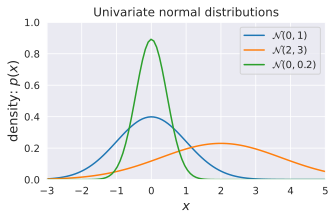

In [ ]:
# Plot different Univariate Normals
x = np.linspace(-3, 5, num=100)
fig = plt.figure(figsize=(5, 3))
plt.plot(
    x, univariate_normal(x, mean=0, variance=1),
    label=r"$\mathcal{N}(0, 1)$")
plt.plot(
    x, univariate_normal(x, mean=2, variance=3),
    label=r"$\mathcal{N}(2, 3)$")
plt.plot(
    x, univariate_normal(x, mean=0, variance=0.2),
    label=r"$\mathcal{N}(0, 0.2)$")
plt.xlabel('$x$', fontsize=13)
plt.ylabel('density: $p(x)$', fontsize=13)
plt.title('Univariate normal distributions')
plt.ylim([0, 1])
plt.xlim([-3, 5])
plt.legend(loc=1)
fig.subplots_adjust(bottom=0.15)
plt.show()
#


# Sampling
If the $\left\{x_i\right\}$ set is sampled from the probability density function $p(\cdot)$,
the following will be true:
- Average

>$\displaystyle\mathbb{E}[X] =\!\int x\ p(x)\,dx  \ \approx\ \frac{1}{N}\sum_i x_i $

- Variance

>$\displaystyle\mathbb{E}[(X\!-\!\mu)^2]=\int (x\!-\!\mu)^2\ p(x)\,dx \approx \frac{1}{N}\sum_i (x_i\!-\!\mu)^2$, compare to
>$\displaystyle\ s^2=\frac{1}{N\!-\!1}\sum_{i=1}^N \big(x_i\!-\!\bar{x}\big)^2 $
if the sample mean $\mu$ is unknown.


-0.001406710973587577


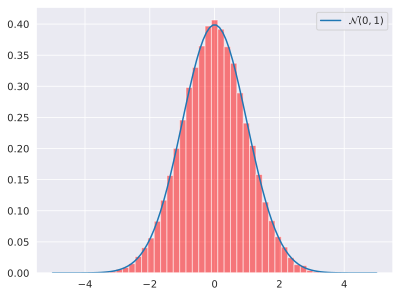

In [ ]:
# generate sample with size N
mu, sigma, N = 0, 1, 50000
x = np.random.normal(mu, sigma, N)

avg = np.mean(x)
print (avg)

# variance estimates
s2   = np.sum( (x-avg)**2 ) /(N-1)  # correct
s2n  = np.sum( (x-avg)**2 ) / N     # biased
s2k  = np.sum( (x- mu)**2 ) / N     # known mean
fig, ax = plt.subplots()
ax.hist(x , 51, range=[-5,5], color='r', alpha=0.5,density=True);
x_span = np.linspace(-5,5,100)
plt.plot(
    x_span, univariate_normal(x_span, mean=0, variance=1),
    label=r"$\mathcal{N}(0, 1)$")

plt.legend() # Add this line to display the legend

In [ ]:
# standard deviation estimates
np.sqrt(s2), np.sqrt(s2n), np.sqrt(s2k)

(np.float64(1.0001698681513511),
 np.float64(1.0001598664026605),
 np.float64(1.0001599549663054))

## Multivariate normal distribution

The multivariate normal distribution is a multidimensional generalisation of the one-dimensional normal distribution. It represents the distribution of a multivariate random variable that is made up of multiple random variables that can be correlated with each other.

Like the normal distribution, the multivariate normal is defined by sets of parameters: the mean vector $\mathbf{\mu}$, which is the expected value of the distribution; and the covariance matrix $\Sigma$, which measures how dependent two random variables are and how they change together. We denote the covariance between variable $X$ and $Y$ as $C(X,Y)$.  (mention the sample covariance)

The multivariate normal with dimensionality $d$ has a joint probability density given by:

$$
p(\mathbf{x} \mid \mathbf{\mu}, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \lvert\Sigma\rvert}} \exp{ \left( -\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}) \right)}
$$

Where $\mathbf{x}$ a random vector of size $d$, $\mathbf{\mu}$ is the mean vector, $\Sigma$ is the (positive definite) covariance matrix (of size $d \times d$), and $\lvert\Sigma\rvert$ its determinant. We denote this multivariate normal distribution as:

$$
\mathcal{N}(\mathbf{\mu}, \Sigma)
$$

In [ ]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) *
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

Examples of two bivariate normal distributions are plotted below.

The figure on the left is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to $0$ so that these 2 variables are independent:

$$
\mathcal{N}\left(
\begin{bmatrix}
0 \\
0
\end{bmatrix},
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}\right)
$$


The figure on the right is a bivariate distribution with the covariance between $x_1$ and $x_2$ set to be different than $0$ so that both variables are correlated. Increasing $x_1$ will increase the probability that $x_2$ will also increase:


$$
\mathcal{N}\left(
\begin{bmatrix}
0 \\
1
\end{bmatrix},
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)
$$

/tmp/ipython-input-2144384956.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pdf[i,j] = multivariate_normal(


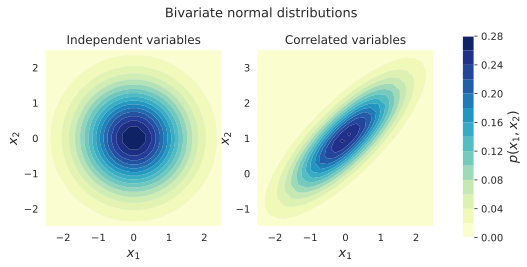

In [ ]:
# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 50 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    pdf = np.zeros((nb_of_x, nb_of_x))
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]),
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
d = 2  # number of dimensions

# Plot of independent Normals
bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.],
    [0., 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax1.contourf(x1, x2, p, 15, cmap=cm.YlGnBu)
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
bivariate_mean = np.matrix([[0.], [1.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.8],
    [0.8, 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax2.contourf(x1, x2, p, 15, cmap=cm.YlGnBu)
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_aspect('equal')
ax2.set_title('Correlated variables', fontsize=12)

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.show()
#

### Affine transformations of the multivariate normal

It is possible to transform a multivariate normal distribution into a new normal distribution with an affine transformation. More specifically if $X$ is normally distributed and $Y = LX + u$ with $L$ a linear transformation and $u$ a vector then $Y$ is also normally distributed with mean $\mu_{Y} = u + L\mu_{X}$ and covariance matrix $\Sigma_{Y} = L\Sigma_{X}L^T$.

$$Y \sim \mathcal{N}(\mu_{Y}, \Sigma_{Y}) \quad\quad X \sim \mathcal{N}(\mu_{X}, \Sigma_{X}) \\
\mathcal{N}(\mu_{Y}, \Sigma_{Y}) = \mathcal{N}(u + L\mu_{X}, L\Sigma_{X}L^T) = L\mathcal{N}(\mu_{X}, \Sigma_{X}) + u$$

This can be proven as follows:

$$\mu_{Y} = \mathbb{E}[Y] = \mathbb{E}[LX + u] = \mathbb{E}[LX] + u = L\mu_{X} + u$$

$$\begin{split}
\Sigma_{Y} & = \mathbb{E}[(Y-\mu_{Y})(Y-\mu_{Y})^\top] \\
           & = \mathbb{E}[(LX+u - L\mu_{X}-u)(LX+u - L\mu_{X}-u)^\top] \\
           & = \mathbb{E}[(L(X-\mu_{X})) (L(X-\mu_{X}))^\top] \\
           & = \mathbb{E}[L(X-\mu_{X}) (X-\mu_{X})^\top L^\top] \\
           & = L\mathbb{E}[(X-\mu_{X})(X-\mu_{X})^\top]L^\top \\
           & = L\Sigma_{X}L^\top
\end{split}$$

## Sampling from a multivariate normal

The previous formula helps us to [sample from any multivariate Guassian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Drawing_values_from_the_distribution).  
To do this sampling we can sample $X$ from the standard normal distribution $X \sim \mathcal{N}(0, I_d)$, where the mean is the vector $\mu=0$ and the covariance is the identity matrix $\Sigma=I_d$. Sampling from this distribution is easier because each variable in $X$ is independent from all other variables, we can just sample each variable separately.

It is then possible to sample $Y$ from $\mathcal{N}(\mu_{Y}, \Sigma_{Y})$ by sampling $X$ and applying the affine transform on the samples. This transform is $Y = LX + u$ where we know from the previous section that the covariance of $Y$ will be $\Sigma_{Y} = L\Sigma_{X}L^\top$. Since $\Sigma_{X}=I_d$ we can write that $\Sigma_{Y} = L I_d L^\top = L L^\top$. $L$ can now be found by a technique called the Cholesky decompostion which does exactly the decomposition we need. The vector $u$ is then $\mu_{Y}$ since $\mu_{X}=0$ ($u = \mu_{Y} - L\mu_{X}$).

Lets try this out by sampling 50 samples from:

$$
Y
\sim
\mathcal{N}\left(
\begin{bmatrix} 0 \\
1
\end{bmatrix},
\begin{bmatrix}
1 & 0.8 \\
0.8 & 1
\end{bmatrix}\right)
$$

The sampling is done by the following code and the samples are plotted as red dots on the probability density surface below.

In [ ]:
# Sample from:
d = 2 # Number of dimensions
mean = np.matrix([[0.], [1.]])
covariance = np.matrix([
    [1, 0.8],
    [0.8, 1]
])

# Create L
L = np.linalg.cholesky(covariance)
# Sample X from standard normal
n = 100  # Samples to draw
X = np.random.normal(size=(d, n))
# Apply the transformation
Y = L.dot(X) + mean

/tmp/ipython-input-2144384956.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pdf[i,j] = multivariate_normal(


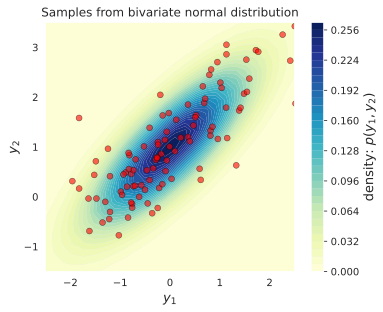

In [ ]:
# Plot the samples and the distribution
fig, ax = plt.subplots(figsize=(6, 4.5))
# Plot bivariate distribution
x1, x2, p = generate_surface(mean, covariance, d)
con = ax.contourf(x1, x2, p, 33, cmap=cm.YlGnBu)
# Plot samples
ax.plot(Y[0,:], Y[1,:], 'ro', alpha=.6,
        markeredgecolor='k', markeredgewidth=0.5)
ax.set_xlabel('$y_1$', fontsize=13)
ax.set_ylabel('$y_2$', fontsize=13)
ax.axis([-2.5, 2.5, -1.5, 3.5])
ax.set_aspect('equal')
ax.set_title('Samples from bivariate normal distribution')
cbar = plt.colorbar(con)
cbar.ax.set_ylabel('density: $p(y_1, y_2)$', fontsize=13)
plt.show()
#

# Marginal and Conditional normal distributions

If both $\mathbf{x}$ and $\mathbf{y}$ are jointly normal random vectors defined as:
$$
\begin{bmatrix}
\mathbf{x} \\
\mathbf{y}
\end{bmatrix}
\sim
\mathcal{N}\left(
\begin{bmatrix}
\mu_{\mathbf{x}} \\
\mu_{\mathbf{y}}
\end{bmatrix},
\begin{bmatrix}
A & C \\
C^T & B
\end{bmatrix}
\right)
= \mathcal{N}(\mu, \Sigma)$$

In [ ]:
d = 2  # dimensions
mean = np.matrix([[0.], [1.]])
cov = np.matrix([
    [1, 0.8],
    [0.8, 1]
])

# Get the mean values from the vector
mean_x = mean[0,0]
mean_y = mean[1,0]
# Get the blocks (single values in this case) from
#  the covariance matrix
A = cov[0, 0]
B = cov[1, 1]
C = cov[0, 1]  # = C transpose in this case

## Marginal distribution

A marginal distribution is the distribution of a subset of random variables from the original distribution. It represents the probabilities or densities of the variables in the subset without reference to the other values in the original distribution.

In our case of the 2D multivariate normal the marginal distributions are the univariate distributions of each component $\mathbf{x}$ and $\mathbf{y}$ separately. They are defined as:

$$
\begin{split}
p(\mathbf{x}) & = \mathcal{N}(\mu_{\mathbf{x}}, A) \\
p(\mathbf{y}) & = \mathcal{N}(\mu_{\mathbf{y}}, B)
\end{split}
$$


/tmp/ipython-input-2144384956.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pdf[i,j] = multivariate_normal(


(-2.5, 2.5)

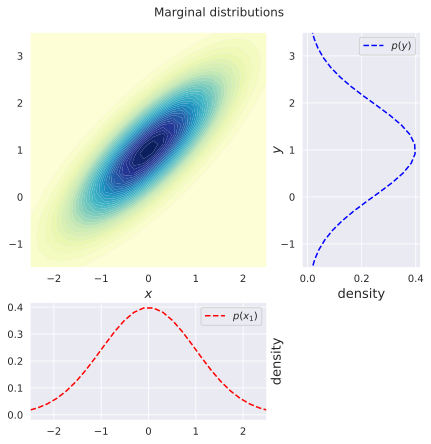

In [ ]:
# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Marginal distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mean, cov, d)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 33, cmap=cm.YlGnBu)
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# Plot y
ax2 = plt.subplot(gs[1])
y = np.linspace(-5, 5, num=50)
py = univariate_normal(y, mean_y, A)
# Plot univariate distribution
ax2.plot(py, y, 'b--', label=f'$p(y)$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=13)
ax2.set_ylim(-1.5, 3.5)

# Plot x
ax3 = plt.subplot(gs[2])
x = np.linspace(-5, 5, num=50)
px = univariate_normal(x, mean_x, B)
# Plot univariate distribution
ax3.plot(x, px, 'r--', label=f'$p(x_1)$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

### Conditional distribution
(derive it if time permitted)
The conditional distribution of $\mathbf{x}$ given $\mathbf{y}$ is defined as:

$$
p(\mathbf{x} \mid \mathbf{y}) = \mathcal{N}(\mu_{x|y}, \Sigma_{x|y})
$$

With:
$$\begin{split}
\Sigma_{x|y} & = A - CB^{-1}C^\top = \tilde{A}^{-1} \\
\mu_{x|y} & = \mu_x + CB^{-1}(\mathbf{y}-\mu_y)
\end{split}$$

With $A - CB^{-1}C^\top = \tilde{A}^{-1}$ the Schur complement] of B in $\Sigma$. The computation of the conditional covariance matrix $\Sigma_{x|y}$ can be viewed as inverting the covariance matrix $\Sigma^{-1} = \Lambda$, dropping the rows and columns corresponding to the variables $\mathbf{y}$ that are being conditioned upon (Selecting $\tilde{A}$), and inverting back to get the conditional covariance matrix $\Sigma_{x|y}=\tilde{A}^{-1}$.

The shift of the mean can be seen as getting the residual of the variable conditioned upon $(\mathbf{y}-\mu_y)$, normalising this with the covariance $B$ of the variable conditioned upon, and transforming it to the space of $\mathbf{x}$ by the covariances between $\mathbf{x}$ and $\mathbf{y}$ $(C)$.

The conditional distributions of the example used above are calculated and plotted in the following code:

In [ ]:
# Calculate x|y
y_condition = 1.  # To condition on y
mean_xgiveny = mean_x + (C * (1/B) * (y_condition - mean_y))
cov_xgiveny = A - C * (1/B) * C

# Calculate y|x
x_condition = -1.  # To condition on x
mean_ygivenx = mean_y + (C * (1/A) * (x_condition - mean_x))
cov_ygivenx = B - (C * (1/A) * C)

/tmp/ipython-input-2144384956.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pdf[i,j] = multivariate_normal(


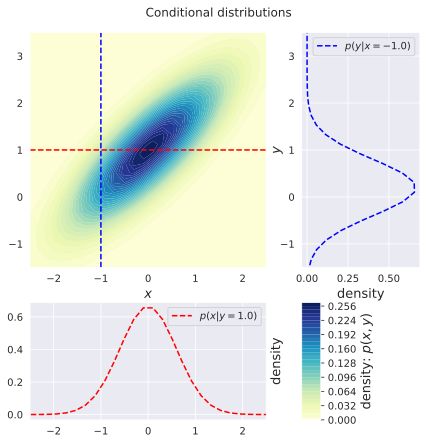

In [ ]:
# Plot the conditional distributions
fig = plt.figure(figsize=(7, 7))
gs = gridspec.GridSpec(
    2, 2, width_ratios=[2, 1], height_ratios=[2, 1])
# gs.update(wspace=0., hspace=0.)
plt.suptitle('Conditional distributions', y=0.93)

# Plot surface on top left
ax1 = plt.subplot(gs[0])
x, y, p = generate_surface(mean, cov, d)
# Plot bivariate distribution
con = ax1.contourf(x, y, p, 33, cmap=cm.YlGnBu)
# y=1 that is conditioned upon
ax1.plot([-2.5, 2.5], [y_condition, y_condition], 'r--')
# x=-1. that is conditioned upon
ax1.plot([x_condition, x_condition], [-1.5, 3.5], 'b--')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.yaxis.set_label_position('right')
ax1.axis([-2.5, 2.5, -1.5, 3.5])

# Plot y|x
ax2 = plt.subplot(gs[1])
yx = np.linspace(-5, 5, num=50)
pyx = univariate_normal(yx, mean_ygivenx, cov_ygivenx)
# Plot univariate distribution
ax2.plot(pyx, yx, 'b--',
         label=f'$p(y|x={x_condition:.1f})$')
ax2.legend(loc=0)
ax2.set_xlabel('density', fontsize=13)
ax2.set_ylim(-1.5, 3.5)

# Plot x|y
ax3 = plt.subplot(gs[2])
xy = np.linspace(-5, 5, num=50)
pxy = univariate_normal(xy, mean_xgiveny, cov_xgiveny)
# Plot univariate distribution
ax3.plot(xy, pxy, 'r--',
         label=f'$p(x|y={y_condition:.1f})$')
ax3.legend(loc=0)
ax3.set_ylabel('density', fontsize=13)
ax3.yaxis.set_label_position('right')
ax3.set_xlim(-2.5, 2.5)

# Clear axis 4 and plot colarbar in its place
ax4 = plt.subplot(gs[3])
ax4.set_visible(False)
divider = make_axes_locatable(ax4)
cax = divider.append_axes('left', size='20%', pad=0.05)
cbar = fig.colorbar(con, cax=cax)
cbar.ax.set_ylabel('density: $p(x, y)$', fontsize=13)
plt.show()
#

## Bayes' rule
"Bayes's theorem is to the theory of probability what Pythagoras's theorem is to geometry."

$$ p(H=h | Y=y) = \frac{p(H=h)p(Y=y|H=h)}{p(Y=y)}$$

**Example**: Say you may have contracted COVID-19, You decide to take a diagnostic test, and you want to use its result to
determine if you are infected or not.

Let $H = 1$ be the event that you are infected, and $H = 0$ be the event you are not infected. Let
$Y = 1$ if the test is positive, and $Y = 0$ if the test is negative. The **sensitivity** (aka true positive rate) is defined as
$p(Y = 1|H = 1)$. The **specificity** (aka true negative rate)
is defined as $p(Y = 0|H = 0)$. We set
the sensitivity to 87.5% and the specificity to 97.5%. The quantity $p(H = 1)$ represents the prevalence of the
disease in the area in which you live. We set this to $p(H = 1) = 0.1$ (i.e., 10%).

Now suppose you test positive,
$$
\begin{split}
p(H = 1|Y = 1) &= \frac{p(Y = 1|H = 1)p(H=1)}{p(Y = 1|H = 1)p(H=1) + p(Y = 1|H = 0)p(H=0)}  \\
&=\frac{0.875 \times 0.1}{0.875\times0.1 + 0.025 \times0.9} = 0.795
\end {split}
$$
There is a 79.5% chance you are infected.

Suppose you test negative,
$$
\begin{split}
p(H = 1|Y = 0) &= \frac{p(Y = 0|H = 1)p(H=1)}{p(Y = 0|H = 1)p(H=1) + p(Y = 0|H = 0)p(H=0)}  \\
&=\frac{0.125 \times 0.1}{0.125\times0.1 + 0.975 \times0.9} = 0.014
\end {split}
$$
So there is just a 1.4% chance you are infected.